# Importing Libraries

In [30]:
# Import necessary modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [31]:
# Load the dataset.
car_data = pd.read_csv("../car_data/CarPriceData.csv")

In [32]:
# Display descriptions for each feature.
descriptions = {
    'car_ID': "Unique identifier for each car",
    'symboling': "Insurance risk rating for the car",
    'CarName': "Name or model of the car",
    'fueltype': "Type of fuel used (gas or diesel)",
    'aspiration': "Method of air intake for the engine (std or turbo)",
    'doornumber': "Number of doors on the car",
    'carbody': "Type of car body or design (sedan, hatchback, etc.)",
    'drivewheel': "Type of drivetrain or wheels (FWD, RWD, 4WD)",
    'enginelocation': "Engine location (front or rear)",
    'wheelbase': "Distance between front and rear axles",
    'carlength': "Length of the car",
    'carwidth': "Width of the car",
    'carheight': "Height of the car",
    'curbweight': "Weight of the car without passengers or cargo",
    'enginetype': "Type of engine (ohc, ohcv, etc.)",
    'cylindernumber': "Number of cylinders in the engine",
    'enginesize': "Size of the engine (in cc or ci)",
    'fuelsystem': "Type of fuel injection system (mpfi, etc.)",
    'boreratio': "Ratio of cylinder bore diameter to stroke length",
    'stroke': "Length of the engine stroke",
    'compressionratio': "Engine compression ratio",
    'horsepower': "Engine power output (in hp)",
    'peakrpm': "Engine's peak RPM for generating power",
    'citympg': "Fuel efficiency in city driving (mpg)",
    'highwaympg': "Fuel efficiency on the highway (mpg)",
    'price': "Price of the car"
}

for column in car_data.columns:
    print(f"{column}: {descriptions.get(column, 'No description available')}")

car_ID: Unique identifier for each car
symboling: Insurance risk rating for the car
CarName: Name or model of the car
fueltype: Type of fuel used (gas or diesel)
aspiration: Method of air intake for the engine (std or turbo)
doornumber: Number of doors on the car
carbody: Type of car body or design (sedan, hatchback, etc.)
drivewheel: Type of drivetrain or wheels (FWD, RWD, 4WD)
enginelocation: Engine location (front or rear)
wheelbase: Distance between front and rear axles
carlength: Length of the car
carwidth: Width of the car
carheight: Height of the car
curbweight: Weight of the car without passengers or cargo
enginetype: Type of engine (ohc, ohcv, etc.)
cylindernumber: Number of cylinders in the engine
enginesize: Size of the engine (in cc or ci)
fuelsystem: Type of fuel injection system (mpfi, etc.)
boreratio: Ratio of cylinder bore diameter to stroke length
stroke: Length of the engine stroke
compressionratio: Engine compression ratio
horsepower: Engine power output (in hp)
peak

# Exploratory Data Analysis (EDA)

In [33]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
car_data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [35]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [36]:
# description of the variables
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [37]:
# A function to calculate the missing values in the dataset
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [38]:
missing_values_table(car_data)

The dataframe has 26 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [39]:
numeric_data = car_data.select_dtypes(include=['number'])

In [40]:
# Calculate correlation
correlation_matrix = numeric_data.corr()
correlation_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [41]:
# Calculate skewness
skewness = numeric_data.skew()
skewness

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

# Some Data Cleaning

In [42]:
# Extract the name of the car manufactures.
car_name = pd.Series([car.split(" ")[0] for car in car_data['CarName']], index = car_data.index)
car_name

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Length: 205, dtype: object

In [43]:
# Create new column for car company names.
car_data['car_company'] = car_name

# Replace misspelled car company names
corrections = {
    "vw": "volkswagen",
    "vokswagen": "volkswagen",
    "porcshce": "porsche",
    "toyouta": "toyota",
    "Nissan": "nissan",
    "maxda": "mazda"
}
car_data['car_company'].replace(corrections, inplace=True)

# Drop the 'CarName' column
car_data.drop(columns=['CarName'], inplace=True)

# Select numeric columns
cars_numeric_data = car_data.select_dtypes(include=['int64', 'float64'])

# Drop the 'car_ID' column
cars_numeric_data.drop(columns=['car_ID'], inplace=True)

/var/folders/cm/7lt19cbn0pl4f80f0268dsl00000gn/T/ipykernel_25226/2261607037.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data['car_company'].replace(corrections, inplace=True)


In [44]:
car_data

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


# Data Visualization

Average Car Prices by Company

In [45]:
company_prices = car_data.groupby('car_company')['price'].mean().sort_values(ascending=False)
company_prices

car_company
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

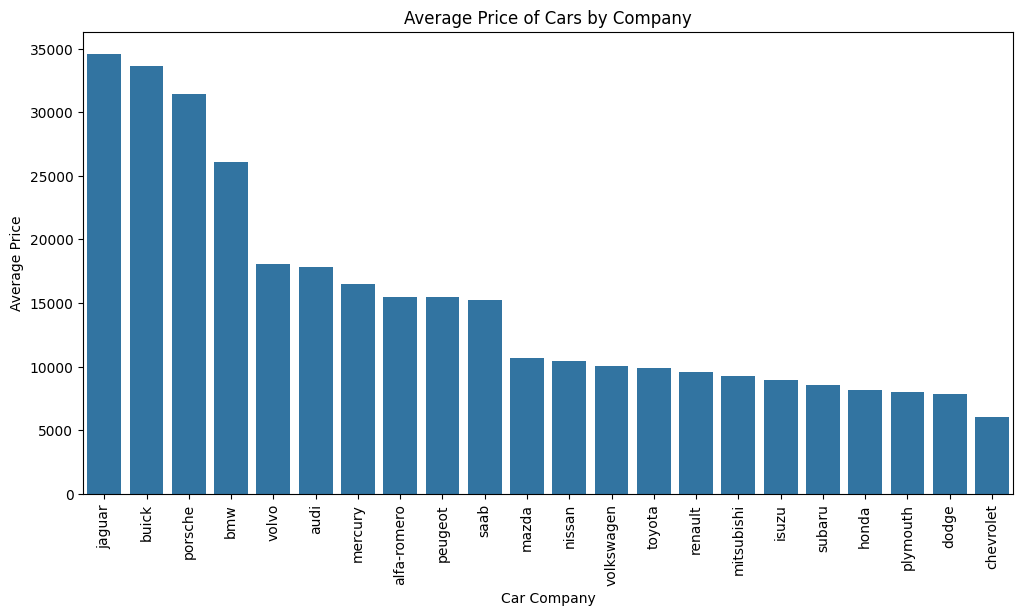

In [46]:
# plotting the average price of cars by company
plt.figure(figsize=(12, 6))
sns.barplot(x=company_prices.index, y=company_prices.values)
plt.xticks(rotation=90)
plt.xlabel('Car Company')
plt.ylabel('Average Price')
plt.title('Average Price of Cars by Company')
plt.show()

Correlation heatmap

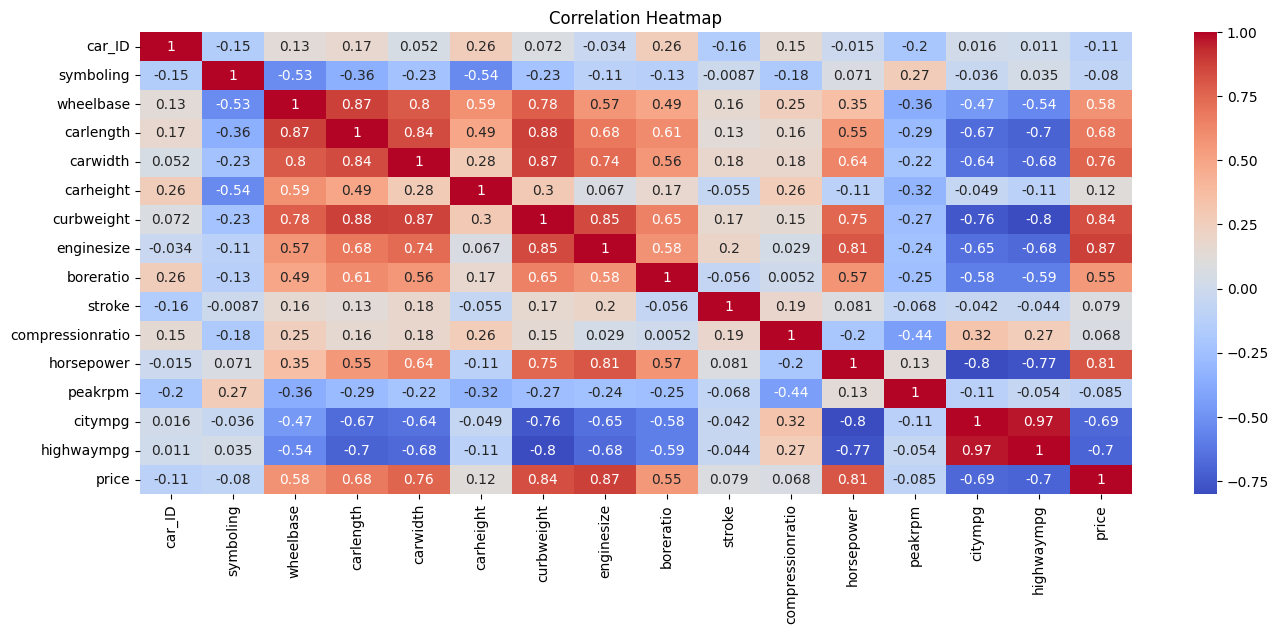

In [47]:
# Plotting heatmap of the data for checking the correlation between the numerical features and target column.
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation of numerical variables

- wheelbase have positive correlation with price of 58%.
- car length and car width have positive correlation with price of 68% and 76%.
- curbweight have positive correlation with price of 84%.
- enginesize have positive correlation with price of 87%.
- boreratio have positive correlation with price of 55%.
- horsepower have positive correlation with price of 81%.
- citympg and highwaympg have negative correlation with price of 69% and 70%.

In [53]:
# %pip install dython

/usr/local/lib/python3.11/site-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/lib/python3.11/site-packages/dython/nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


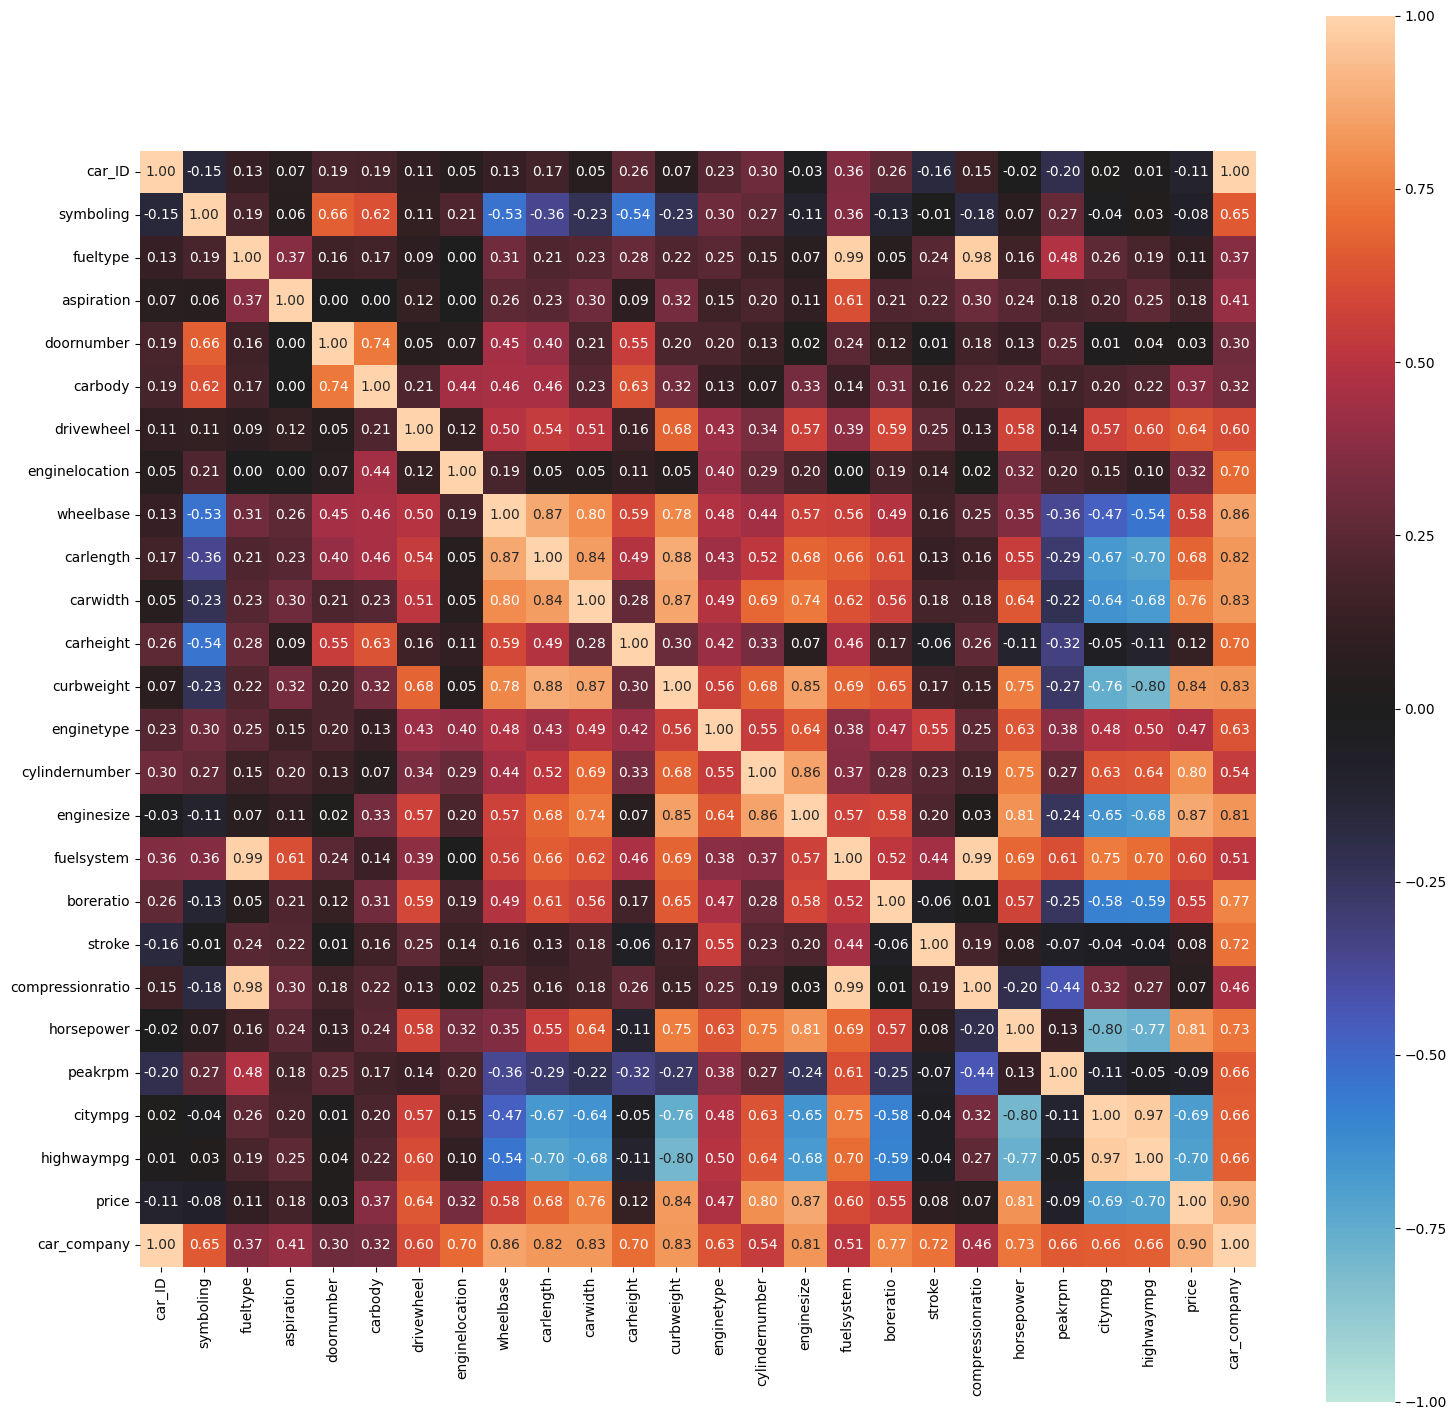

In [49]:
# finding correlation of numerical and categorical features

from dython.nominal import associations

associations(car_data, figsize = (18, 18))
plt.show()

Correlation of categorical variables

- carcompany is highly correlated with price of 90%.
- drivewheel have positive correlation with price of 64%.
- enginetype have positive correlation with price of 47%.
- cylindernumber have a significant positive correlation with price of 80%.
- fuelsystem have positive correlation with price of 60%.

Possibility of multicollinearity in features

- carcompany is highly correlated with multiple columns.
- fuel type is highly correlated with fuelsystem and compressionratio.
- carlength and carwidth are highly positive correlated.
- wheelbase is highly positive correlated with carlength, carwidth, and carweight.
- cylinder number is positively correlated with enginesize.
- fuelsystem and compressionratio is very highly positive correlated.
- citympg has highly positive correlation with highwaympg.

# More Data Cleaning

In [50]:
# Mapping the categorical data to numerical data
def nums_mapping(series):
    word_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
    return series.map(word_dict)

In [51]:
# Map the values for the doornumbers and cylindernumbers.
car_data[['cylindernumber', 'doornumber']] = car_data[['cylindernumber', 'doornumber']].apply(nums_mapping, axis = 1)

In [52]:
# Convert categorical variables to numerical
categorical_cols = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']
car_data = pd.get_dummies(car_data, columns=categorical_cols, drop_first=True)
car_data

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,False,True,False,False,False,False,False,True,False,False
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,202,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,203,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,...,False,True,False,False,False,False,False,True,False,False
203,204,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False
